# 💳 Proyecto de Análisis Exploratorio: Detección de Fraude en Tarjetas de Crédito

## 📌 Descripción del Proyecto

Este proyecto desarrolla un análisis exploratorio de datos (EDA) sobre un conjunto de transacciones con tarjetas de crédito, con el objetivo de identificar patrones asociados a operaciones fraudulentas.

Los principales objetivos son:

- Comprender la estructura del dataset
- Analizar el desbalance de clases
- Explorar las características estadísticas de las variables
- Identificar variables potencialmente relevantes para futuros modelos predictivos

---

## 📂 Información del Dataset

El dataset contiene 284.807 transacciones y 31 variables numéricas.

Las variables V1–V28 fueron transformadas mediante Análisis de Componentes Principales (PCA) con el fin de proteger información sensible y preservar la confidencialidad de los datos originales.

*Variable objetivo:*
- Class = 0 → Transacción normal  
- Class = 1 → Fraude

## 📚 Importación de librerías

En esta sección se importan las librerías necesarias para el análisis exploratorio de datos.

- pandas: manipulación y análisis de datos
- numpy: operaciones numéricas
- matplotlib: visualización básica
- seaborn: visualizaciones estadísticas más avanzadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 📥 Carga del dataset

Se carga el archivo creditcard.csv en un DataFrame de pandas para comenzar el análisis.


In [2]:
from google.colab import files
unploaded = files.upload()

df = pd.read_csv('creditcard.csv')
df.head()

Saving creditcard.csv to creditcard.csv


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 🔎 Dimensiones del dataset

Se verifica el tamaño del dataset para conocer la cantidad de registros y variables disponibles.

In [3]:
df.shape

(284807, 31)

El dataset contiene 284.807 transacciones y 31 variables.

Esto indica que se trata de un volumen considerable de datos, lo que permite realizar un análisis estadístico robusto.

## 🔍 Verificación de valores nulos

Se analiza la presencia de valores faltantes en el dataset para determinar si será necesario aplicar técnicas de limpieza o imputación de datos.

In [4]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


No se observan valores nulos en ninguna de las variables del dataset.

Esto indica que el conjunto de datos está completo y no requiere procesos adicionales de limpieza relacionados con valores faltantes, lo que simplifica el análisis posterior.

## ⚖️ Distribución de la variable objetivo

Se analiza la cantidad de transacciones normales y fraudulentas para evaluar el desbalance de clases.

In [5]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


Se observa que la gran mayoría de las transacciones corresponden a la clase 0 (normales), mientras que los casos de fraude (clase 1) representan una proporción mínima del total.

Este marcado desbalance de clases es un aspecto crítico del dataset, ya que puede influir significativamente en el desempeño de los modelos predictivos.

En particular, métricas como la accuracy podrían resultar engañosas, debido a que un modelo podría predecir la mayoría de los casos como "no fraude" y aun así obtener una alta precisión general.

Por lo tanto, será necesario considerar métricas más adecuadas como precision, recall y F1-score en etapas posteriores del análisis.

### 📊 Distribución porcentual de las clases

Se calcula la proporción que representa cada clase respecto al total de transacciones para dimensionar el nivel de desbalance del dataset.

In [6]:
df['Class'].value_counts(normalize=True)*100

,proportion
Class,
0,99.827251
1,0.172749


Se observa que aproximadamente el 99.8% de las transacciones corresponden a la clase 0 (normales), mientras que alrededor del 0.2% pertenecen a la clase 1 (fraudes).

Este fuerte desbalance es un aspecto crítico del dataset, ya que puede afectar la evaluación de modelos predictivos. En este tipo de problemas, métricas como la precisión (accuracy) pueden resultar engañosas, por lo que será necesario considerar métricas alternativas en futuras etapas.

## 💰 Análisis del monto según tipo de transacción

Se comparan estadísticas descriptivas del monto (Amount) entre transacciones normales y fraudulentas para identificar posibles diferencias en su comportamiento.

In [7]:
df.groupby('Class')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


Se observa que los montos asociados a fraudes presentan una distribución distinta en comparación con las transacciones normales.

Este análisis permite evaluar si el valor monetario podría ser una variable relevante en la detección de fraude.

## 📦 Comparación visual de montos según tipo de transacción

Se utiliza un diagrama de caja (boxplot) para comparar la distribución de los montos (Amount) entre transacciones normales y fraudulentas.

Dado que los montos presentan valores extremos y una distribución asimétrica, se aplica una escala logarítmica en el eje Y para facilitar la visualización.

/tmp/ipython-input-3878311268.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['Class']==0]['Amount'],


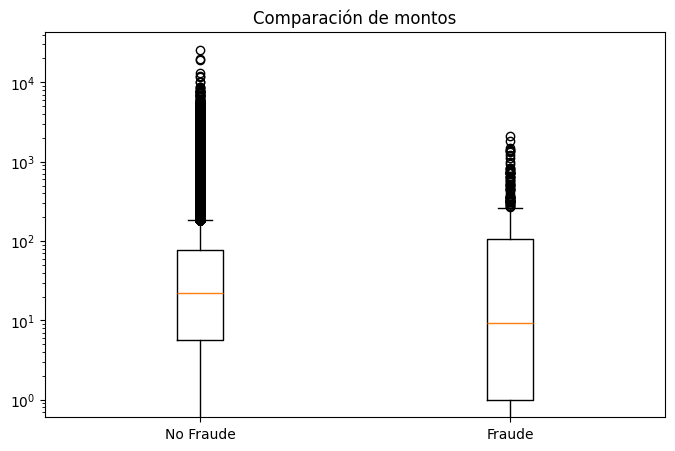

In [8]:
plt.figure(figsize=(8,5))
plt.boxplot([df[df['Class']==0]['Amount'],
             df[df['Class']==1]['Amount']],
            labels=['No Fraude','Fraude'])
plt.yscale('log')  # escala log para ver mejor
plt.title("Comparación de montos")
plt.show()

El gráfico permite observar diferencias en la distribución de los montos entre ambas clases.

Se aprecia que las transacciones fraudulentas presentan una dispersión distinta en comparación con las transacciones normales.

El uso de escala logarítmica permite visualizar mejor los valores extremos y la variabilidad de los datos, que de otra manera quedarían ocultos debido a la presencia de montos muy elevados.

## 🔗 Análisis de correlación con la variable objetivo

Se calcula la correlación de todas las variables numéricas respecto a la variable objetivo (Class) con el fin de identificar cuáles presentan mayor relación con la ocurrencia de fraude.

Las variables se ordenan de mayor a menor correlación para destacar aquellas que podrían ser más relevantes en un futuro modelo predictivo.

In [9]:
correlation = df.corr()['Class'].sort_values(ascending=False)
print(correlation.head(10))
print(correlation.tail(10))

Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


Se observan variables con correlación positiva y negativa respecto a la clase fraude.

Las correlaciones positivas indican que valores más altos de esa variable podrían asociarse con mayor probabilidad de fraude, mientras que las correlaciones negativas sugieren una relación inversa.

Si bien las correlaciones no implican causalidad, este análisis permite identificar variables que podrían tener mayor peso en un modelo de clasificación.

## 📈 Análisis detallado de variables con mayor correlación

A partir del análisis de correlación previo, se seleccionan las variables con mayor relación con la variable objetivo (Class).

Se analiza visualmente la distribución de una de las variables más relevantes (V17) para comparar su comportamiento entre transacciones normales y fraudulentas.

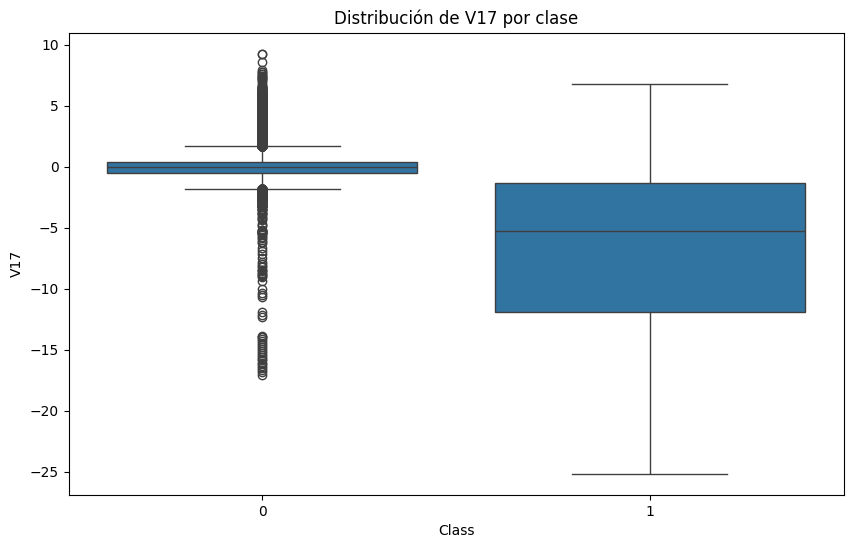

In [11]:
important_vars = ['V17', 'V14', 'V12', 'V10', 'V16', 'V11', 'V4']

plt.figure(figsize=(10,6))
sns.boxplot(data=df[important_vars + ['Class']], x='Class', y='V17')
plt.title("Distribución de V17 por clase")
plt.show()

Se observa una diferencia clara en la distribución de la variable V17 entre las clases.

Esto refuerza el resultado del análisis de correlación, indicando que V17 podría ser una variable relevante en la detección de fraude.

Las diferencias en mediana y dispersión sugieren que esta variable contiene información discriminativa entre transacciones normales y fraudulentas.

## 📊 Conclusiones del Análisis

El dataset presenta un fuerte desbalance de clases, donde aproximadamente el 0.17% de las transacciones corresponden a fraude. Este aspecto representa uno de los principales desafíos del problema.

No se encontraron valores nulos, lo que permitió trabajar con el conjunto de datos sin necesidad de aplicar técnicas de limpieza o imputación.

El análisis de montos mostró que las transacciones fraudulentas se concentran principalmente en rangos bajos, aunque existen valores atípicos de alto monto. Esto indica que el fraude no necesariamente está asociado a transacciones de gran valor.

Las variables con mayor correlación con la clase fraude fueron V17, V14, V12 y V10, lo que sugiere que contienen información relevante para la detección.

Sin embargo, las correlaciones observadas son moderadas, lo que indica que la detección de fraude probablemente requiera la combinación de múltiples variables y no dependa de un único factor.

## 🚀 Próximos Pasos

Como continuación de este análisis exploratorio, el siguiente paso consistiría en aplicar técnicas de balanceo de clases como undersampling u oversampling para mitigar el fuerte desbalance presente en el dataset.

Posteriormente, se podrían construir modelos de clasificación como Logistic Regression o Random Forest, evaluando su desempeño mediante métricas adecuadas para problemas desbalanceados, tales como Precision, Recall y F1-score.

Dado el contexto del problema, se priorizaría la optimización del Recall, ya que el objetivo principal es maximizar la detección de transacciones fraudulentas.

Métricas como Accuracy no serían apropiadas debido al fuerte desbalance de clases, ya que podrían generar resultados engañosos.

## 📌 Cierre

Este análisis exploratorio permitió comprender la estructura del dataset, identificar patrones relevantes asociados al fraude y detectar variables potencialmente significativas para su predicción.

Los hallazgos obtenidos sientan una base sólida para el desarrollo de modelos predictivos más avanzados, teniendo en cuenta los desafíos derivados del desbalance de clases y la naturaleza compleja del problema.